In [2]:
from transformer_pipeline import get_features_transformer, drop_rows
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import  seaborn as sns

In [3]:
df = pd.read_csv("data/movie_statistic_dataset.csv")

df = drop_rows(df)
transformer = get_features_transformer()
X = transformer.fit_transform(df)

# PCA

In [4]:
from sklearn.decomposition import PCA

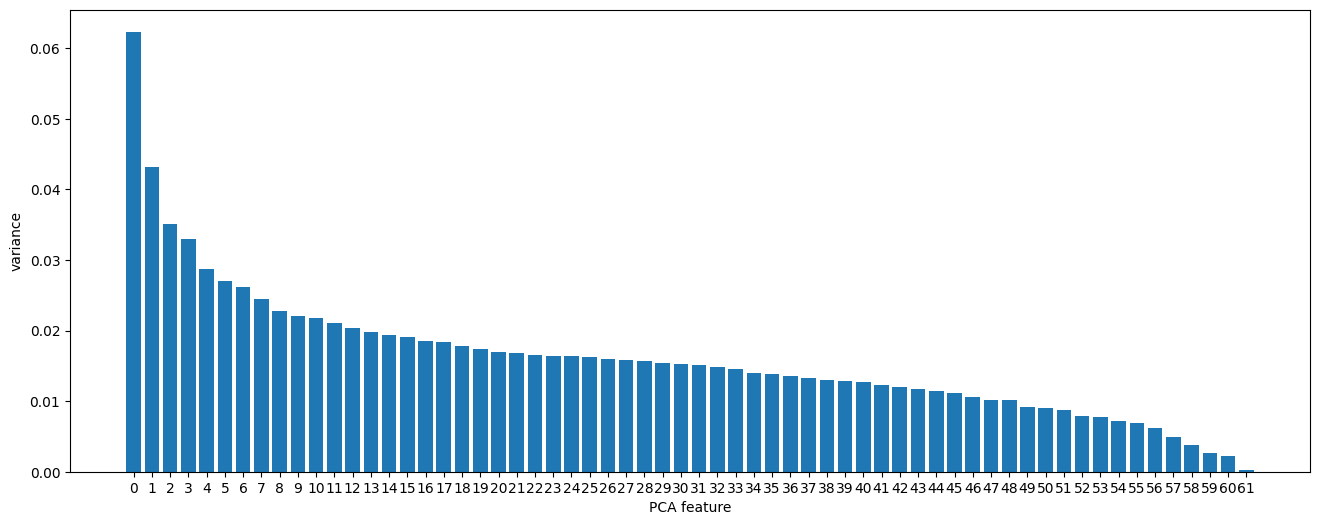

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = StandardScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

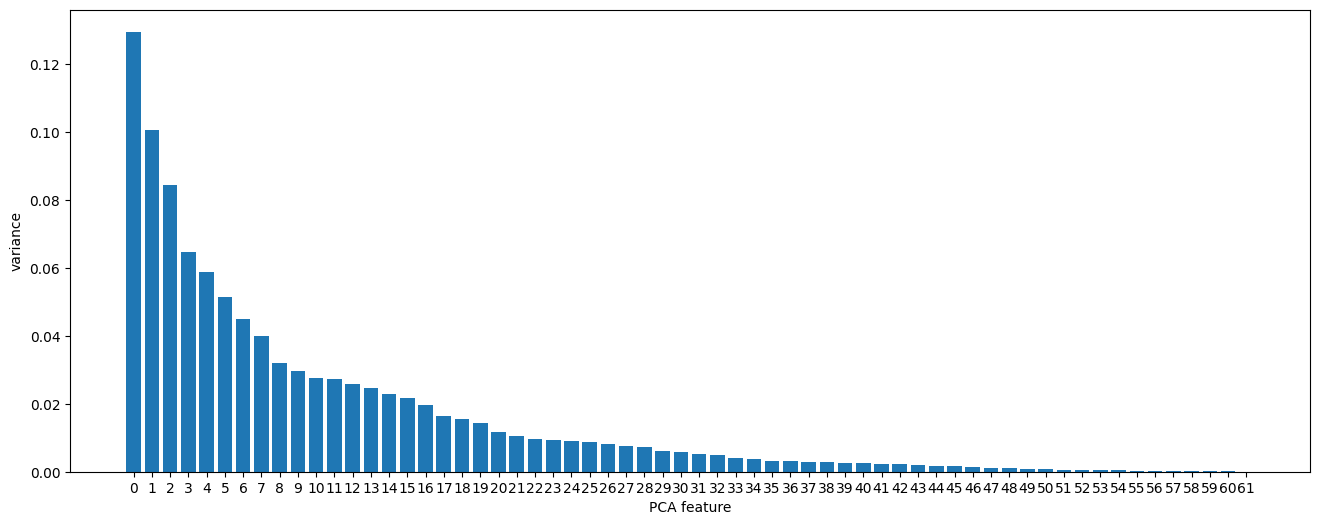

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = MinMaxScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

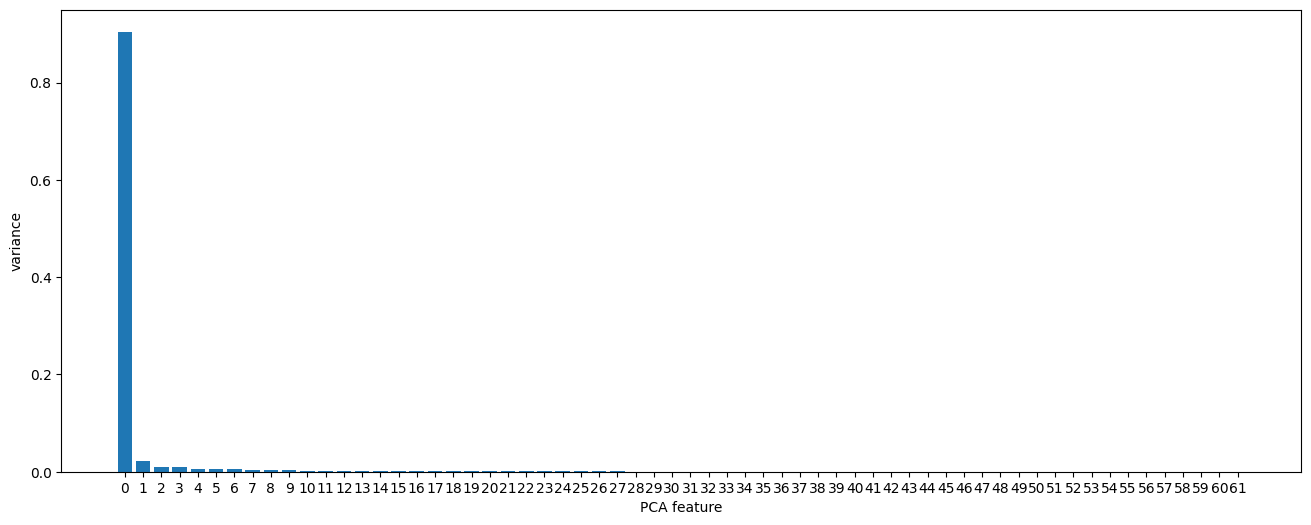

In [59]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline


pca = PCA(svd_solver="full")
scaler = RobustScaler()

pipe = make_pipeline(scaler,pca)

pipe.fit(X)
features = range(pca.n_components_)
plt.figure(figsize=(16, 6))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [60]:
X_transformed = pca.transform(X)
X_transformed.shape


(3490, 62)

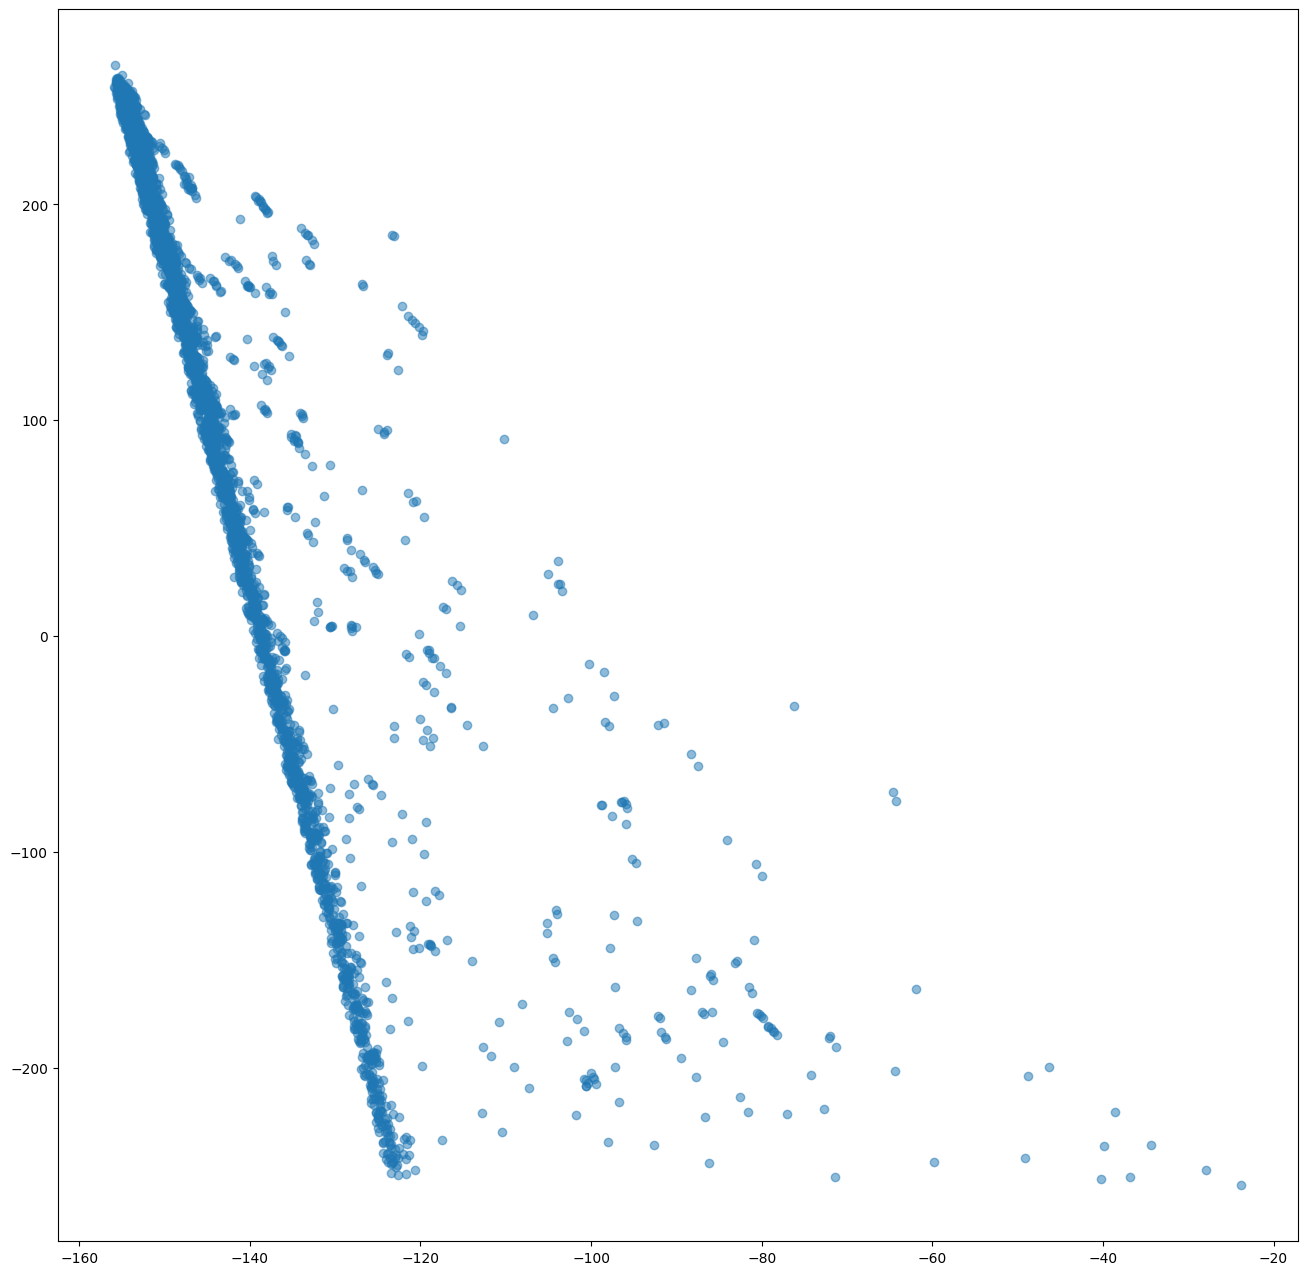

In [63]:
plt.figure(figsize=(16, 16))
plt.scatter(X_transformed[:,0],X_transformed[:,1], alpha= 0.5)
plt.show()